# ICS 434: DATA SCIENCE FUNDAMENTALS

## Mixture Models

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

matplotlib.rcParams['figure.figsize'] = [7, 3.5]

### Mixture Model Intuition

<br>
Example:

* Knowing that there is a difference between the spending of male and  female purchases on a platform and given the sales data where males and females are not labeled, we can use k-means to find the clusters in the data.

* We can then model the spending as Gaussians and try to find the mean and the standard deviation of each distribution.
    * Each data point is simply a random variate from a Gaussian.
    * A data point can have a probability density value under each distribution.

* Let's begin by presuming that we can identify the person associated with each data point.

In [2]:
np.random.seed(45)

mean_males = 204
std_males = 31

mean_females = 257
std_females = 28

sales_males = np.random.normal(mean_males, std_males, 387)
sales_females = np.random.normal(mean_females, std_females, 422)

sales_total = np.concatenate([sales_males, sales_females])

sales_total

array([204.81761796, 212.06997274, 191.75048821, 197.66667194,
       164.5793877 , 123.49676246, 212.98010827, 176.92755604,
       216.21625235, 232.98827186, 203.51377407, 212.04747495,
       158.32725853, 228.85972448, 149.72667601, 188.65339013,
       172.73337491, 204.78256976, 200.2332875 , 156.04693136,
       185.18473682, 160.79180716, 184.54143967, 214.31159679,
       156.2176279 , 255.77929443, 188.51407818, 224.8669979 ,
       273.69077677, 152.71785472, 189.2936925 , 194.64062753,
       175.13818231, 238.44056785, 198.11982829, 243.63069732,
       186.82360931, 214.98338494, 190.35143866, 190.84208635,
       211.07053037, 221.95036918, 177.52016105, 177.91844966,
       183.67317252, 199.44663625, 160.22875947, 195.61273844,
       239.00840244, 162.45199978, 196.27182312, 258.66825859,
       185.64925777, 175.85783788, 212.42578814, 203.85858821,
       230.47731502, 154.7098486 , 205.73751859, 207.28173956,
       201.18403509, 181.86984226, 210.31517721, 241.29

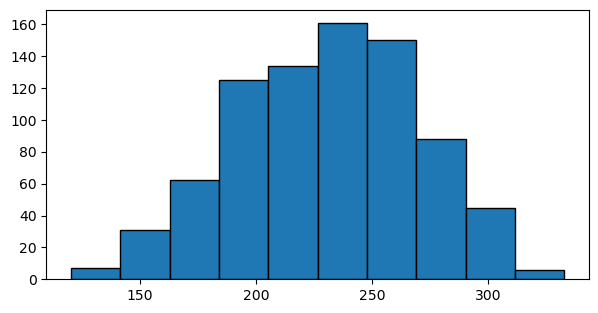

In [3]:
_ = plt.hist(sales_total, edgecolor='k', linewidth=1)

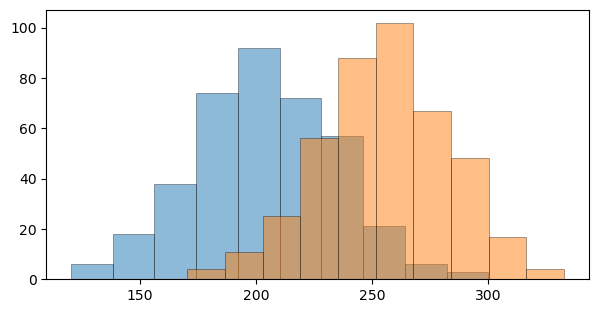

In [4]:
_ = plt.hist(sales_males, alpha=0.5, edgecolor='k', linewidth=0.5)
_ = plt.hist(sales_females, alpha=0.5, edgecolor='k', linewidth=0.5)

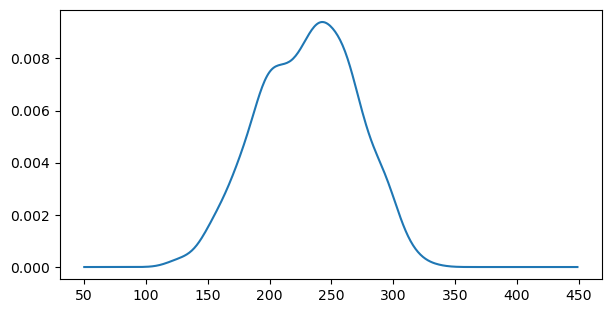

In [5]:
kde_total = sp.stats.gaussian_kde(sales_total, bw_method=0.24)

x_axis = np.arange(50, 450)
y_axis_total = kde_total.evaluate(x_axis)
plt.plot(x_axis, y_axis_total);

### Finite Mixture Model

* The distribution exhibits two different peaks
    * We know that the total sales distribution is a mixture of precisely two distributions 
    * Those are clearer in the KDE than in the histogram
    * They would be much more evident if the means of the two distributions were much farther away



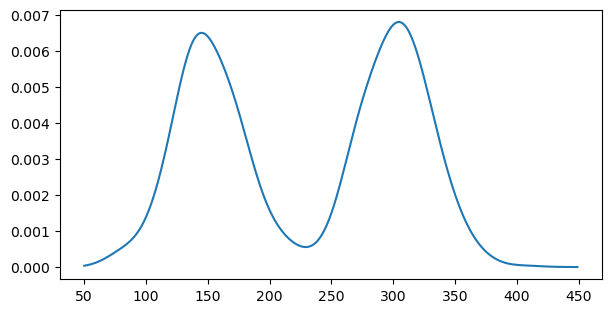

In [13]:
mean_males2, std_males2 = 150, 28
mean_females2, std_females2 = 300, 28

sales_males2 = np.random.normal(mean_males2, std_males2, 387)
sales_females2 = np.random.normal(mean_females2, std_females2, 422)

sales_total2 = np.concatenate([sales_males2, sales_females2])

kde_total2 = sp.stats.gaussian_kde(sales_total2, bw_method=0.17)
y_axis2 = kde_total2.evaluate(x_axis)
plt.plot(x_axis, y_axis2);

### Finite Mixtures -- Cont'd

* Here, the total sales are represented as a finite mixture of two distributions.
  * A mixture distribution is the probability distribution of a random variable derived from a collection of other random variables.
    * i.e., a combined probability distribution that arises from blending several other distributions.

* Mixtures occur naturally:
  * When analyzing spending on the Apple Store, the distribution of prices for professional applications may be substantially different from those for the general public.
      * For instance, prices for apps designed for doctors, stock traders, and frequent travelers may significantly differ from those intended for students
  * Recovery time for patients may vary drastically depending on various factors such as the type of treatment or the patient's pre-existing conditions.
      *  may lead to people who recover quickly and those who don't.
  * etc.
* We can think of these mixture components as clusters.
* Some probabilistic models can account for an infinite number of components (clusters).
  * These models are used, for example, in clustering species or documents.


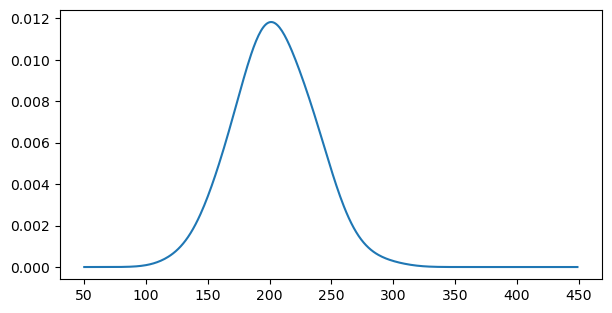

In [7]:
kde_males = sp.stats.gaussian_kde(sales_males, bw_method=0.5)
y_axis_males = kde_males.evaluate(x_axis)
plt.plot(x_axis, y_axis_males);

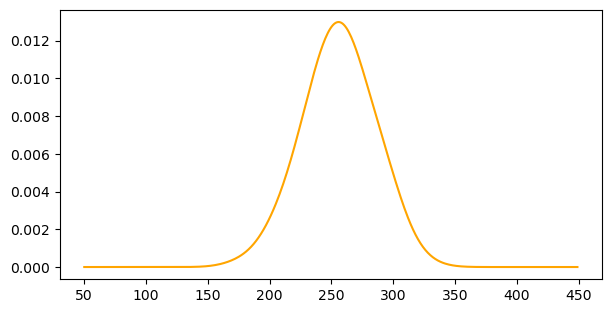

In [8]:
kde_females = sp.stats.gaussian_kde(sales_females, bw_method=0.5)
y_axis_females = kde_females.evaluate(x_axis)
plt.plot(x_axis, y_axis_females, color='orange');

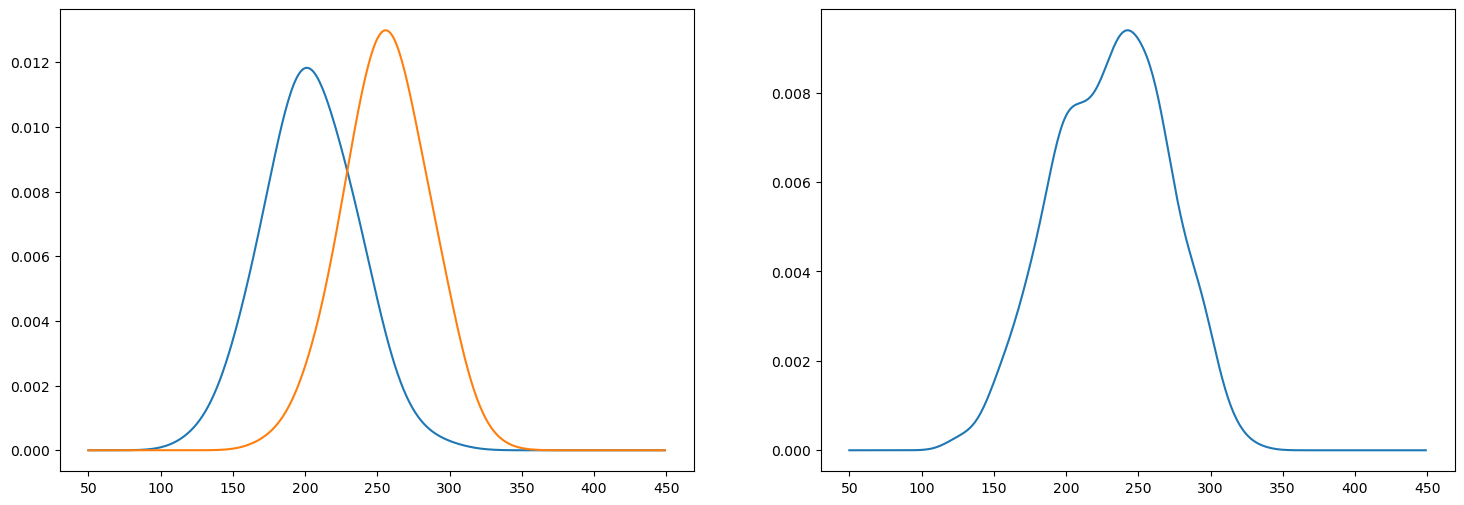

In [9]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(x_axis, y_axis_males)
plt.plot(x_axis, y_axis_females)

plt.subplot(1, 2, 2)
plt.plot(x_axis, y_axis_total);

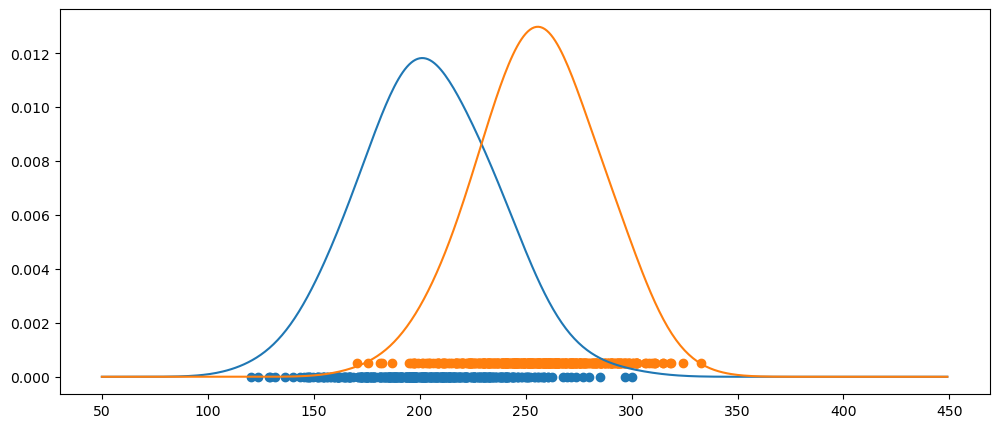

In [10]:
plt.figure(figsize=(12, 5))

plt.plot(x_axis, y_axis_males)
plt.plot(x_axis, y_axis_females)

plt.scatter(sales_males, np.zeros(len(sales_males)))
plt.scatter(sales_females, np.zeros(len(sales_females)) + 0.0005);


### Using k-Means to Identify the Two Clusters

* We know the `sales_total` is a concatenation of `sales_males` and `sales_females`
  * Contains the sales information from 387 males and 422 females

* We can assign each entry in `sales_total` either male (0) or female (1)
 

In [18]:
y_true = np.concatenate([np.zeros(387), np.ones(422)])
y_true[380:394]

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
# from sklearn.cluster import KMeans

# y_predicted = KMeans(n_clusters=2).fit_predict(sales_total.reshape(-1, 1))

In [14]:
from sklearn.cluster import KMeans

X = sales_total.reshape(-1, 1)

kmeans = KMeans(n_clusters=2, n_init=5).fit(X)
y_predicted = kmeans.predict(X)

kmeans.cluster_centers_

array([[194.81303572],
       [259.58191241]])

In [15]:
y_predicted[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0], dtype=int32)

In [16]:
y_predicted[-30:]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [19]:
y_true[-30:]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
len(y_predicted)

809

In [23]:
y_predicted
sum(y_predicted == y_true) / len(y_predicted)

0.8108776266996292

In [24]:
pred_males = np.where(y_predicted == 0)
pred_females = np.where(y_predicted == 1)

pred_males_error = np.where((y_predicted == 0) & (y_true == 1))
pred_females_error = np.where((y_predicted == 1) & (y_true == 0))

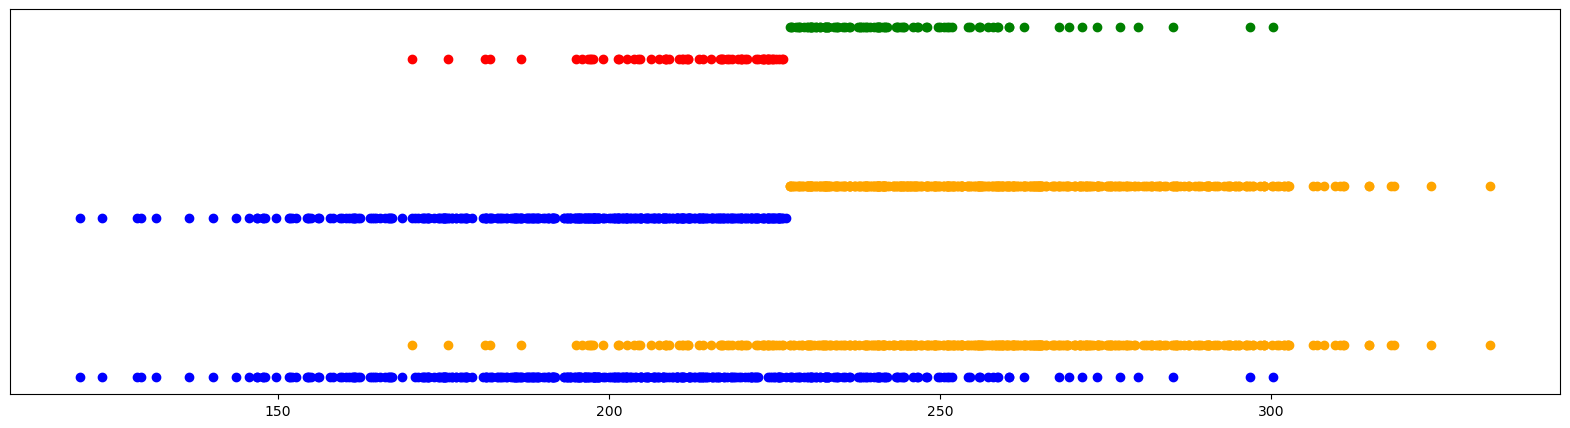

In [25]:
plt.figure(figsize=(20, 5))

# REAL DATA
plt.scatter(sales_total[:len(sales_males)], np.zeros(len(sales_males)), color='blue')
plt.scatter(sales_total[len(sales_males):], np.zeros(len(sales_females))+0.01, color='orange')

# PREDICTED DATA
plt.scatter(sales_total[pred_males], np.zeros(len(y_predicted[pred_males]))+0.05, color='blue')
plt.scatter(sales_total[pred_females], np.zeros(len(y_predicted[pred_females]))+0.06, color='orange')

# ERRORS IN PREDICTION
plt.scatter(sales_total[pred_males_error], np.zeros(len(y_predicted[pred_males_error]))+0.1, color='red')
plt.scatter(sales_total[pred_females_error], np.zeros(len(y_predicted[pred_females_error]))+0.11, color='green')

plt.yticks([], []);

### Impracticality of the k-Means

* Works best with *blobs* of data 
  * The boundary of each cluster is always circular, with the center of the cluster being the mean
  * Clusters with expected high silhouette scores

* Does not work well on overlapping clusters; including overlapping blobs
  * No confidence in the uncertainty in the assignment of each point

* Here, we need an approach that let us include the uncertainty in the clustering

### Modeling a Mixture Distribution

* In the above, we assumed that we know the exact number of males and females 
  * The number of males and females should also be a parameter to our model
    *  Should sample gender from a binomial (ex. for 500 individuals and a proportion of males/females = 0.7)
    
    ```python
    np.random.binomial(1, 0.7, 500)
    ```
  
* A more accurate generative model of the  mixture distribution can be derived as follows
  

In [21]:
np.random.binomial(1, 0.7, 500)

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Defining the Mixture Distribution

<center><img src="https://www.dropbox.com/scl/fi/5lg8ux0qvpmmhz4yqe118/generative_model.png?rlkey=70kzzizpdvchs77g0vzi0otdn&dl=1" alt="drawing" style="width:700px"/>


In [22]:
np.random.seed(42)
male_female_prop = 0.45

mean_males = 204
std_males = 31

mean_females = 257
std_females = 28

sales_males =  []
sales_females = []
cluster = []

for i in range(1000):
    gender = np.random.choice([0, 1], p=[male_female_prop, 1 - male_female_prop])
    if gender == 0:
        cluster.append(0) 
        male_sale = np.random.normal(mean_males, std_males) 
        sales_males.append(male_sale)
    else:
        cluster.append(1)
        female_sale = np.random.normal(mean_females, std_females) 
        sales_females.append(female_sale)
        
sales_total = np.concatenate([sales_males, sales_females])  

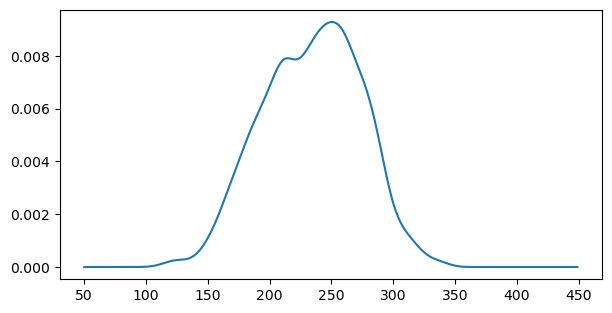

In [23]:
kde_total = sp.stats.gaussian_kde(sales_total, bw_method=0.2)

x_axis_total = np.arange(50, 450)
y_axis_total_kde = kde_total.evaluate(x_axis_total)

plt.plot(x_axis, y_axis_total_kde);

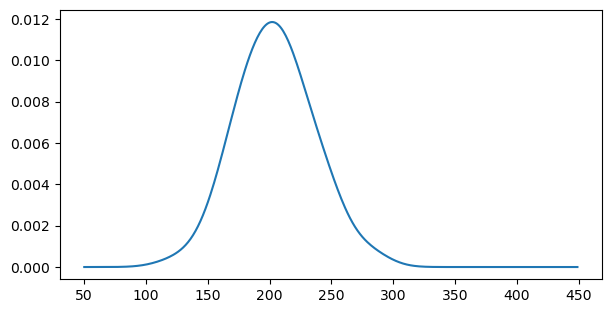

In [24]:
kde_males = sp.stats.gaussian_kde(sales_males, bw_method=0.5)

x_axis_males = np.arange(50, 450)
y_axis_males_kde = kde_males.evaluate(x_axis_males)

plt.plot(x_axis_males, y_axis_males_kde);

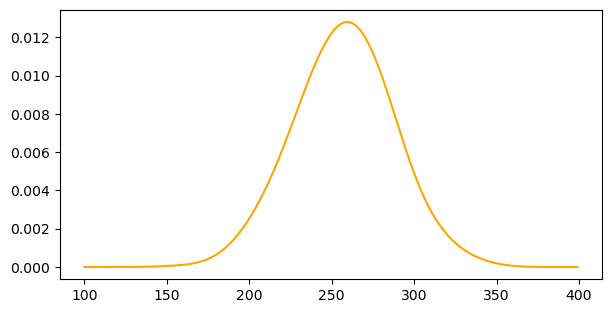

In [25]:
kde_females = sp.stats.gaussian_kde(sales_females, bw_method=0.5)

x_axis_females = np.arange(100, 400)
y_axis_females_kde = kde_females.evaluate(x_axis_females)

plt.plot(x_axis_females, y_axis_females_kde, color="orange");

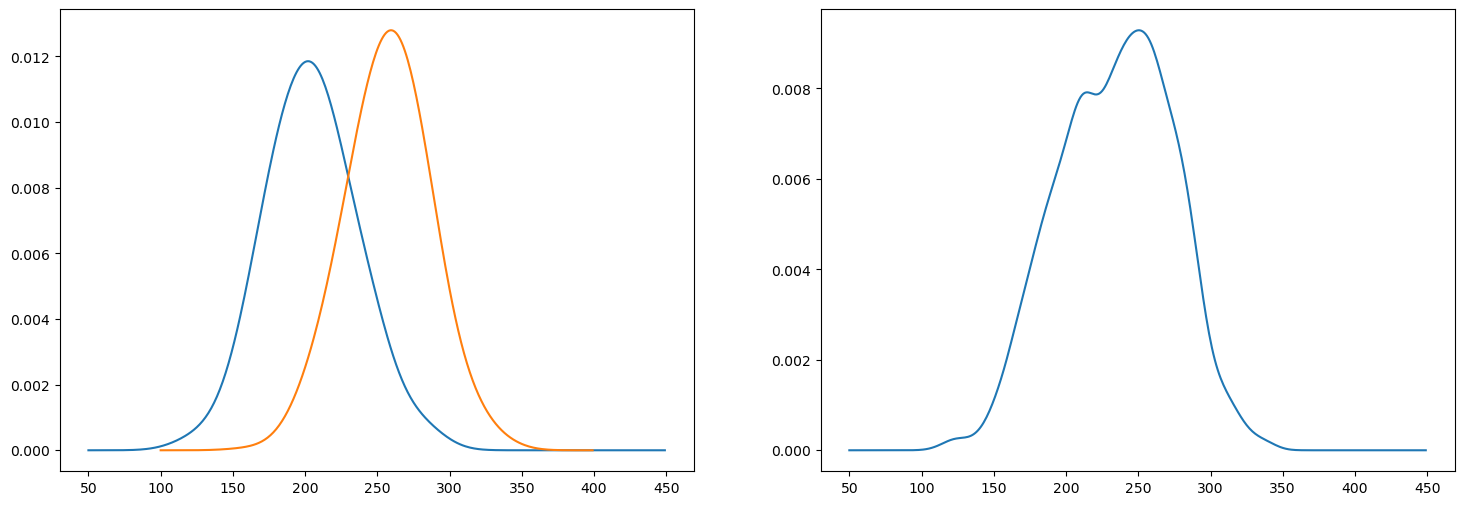

In [26]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(x_axis_males, y_axis_males_kde)
plt.plot(x_axis_females, y_axis_females_kde)

plt.subplot(1, 2, 2)
plt.plot(x_axis, y_axis_total_kde);

### Decomposing the Mixture

* How do we construct a mixture distribution from other random variables?

* The mixture distribution is simply the sum of the two distributions

 * Each point $x$ is evaluated using $\mbox{pdf}_{male}$ and $\mbox{pdf}_{female}$ where <br>

<center>$X_{male} \sim \mathcal{N}(\mu_{male},\sigma_{male})~$ and<br>
    $~X_{female} \sim \mathcal{N} (\mu_{female},\sigma_{female})$ </center>
 
* Recall that: 

$$
\mbox{pdf}(x,\mu,\sigma) = \frac{1}{\sigma\sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{{ x - \mu}}{\sigma}\right)^2}
$$


* $\mu$ and $\sigma$ depend on the size of the sample
   * Combining $X_{male}$ and  $X_{female}$ requires us to normalize by the sample size

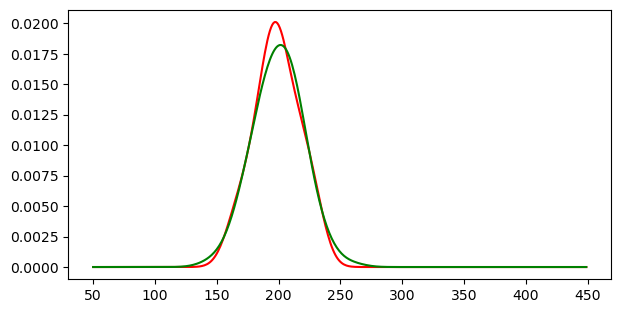

In [27]:
mean_males_temp  = 200
std_males_temp = 20

male_sales_1 = np.random.normal(mean_males_temp, std_males_temp, 100)
male_sales_2 = np.random.normal(mean_males_temp, std_males_temp, 500)

kde_males_1 = sp.stats.gaussian_kde(male_sales_1, bw_method=0.5)
kde_males_2 = sp.stats.gaussian_kde(male_sales_2, bw_method=0.5)

x_axis_temp = np.arange(50, 450)
y_axis_males_kde_1 = kde_males_1.evaluate(x_axis_temp)
y_axis_males_kde_2 = kde_males_2.evaluate(x_axis_temp)

plt.plot(x_axis_temp, y_axis_males_kde_1, color='red')
plt.plot(x_axis_temp, y_axis_males_kde_2, color='green');

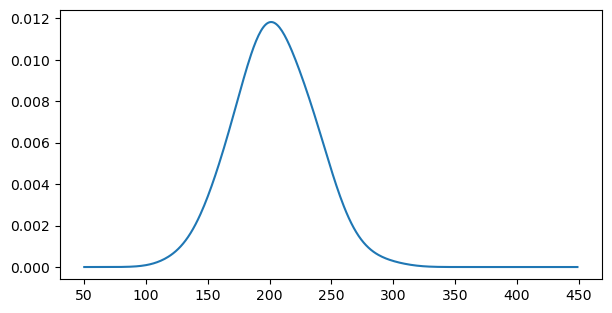

In [28]:
mean_males = 204
std_males = 31

x_axis = np.arange(50, 450)
y_axis_males_theoretical = sp.stats.norm.pdf(x_axis, mean_males, std_males)

plt.plot(x_axis, y_axis_males);

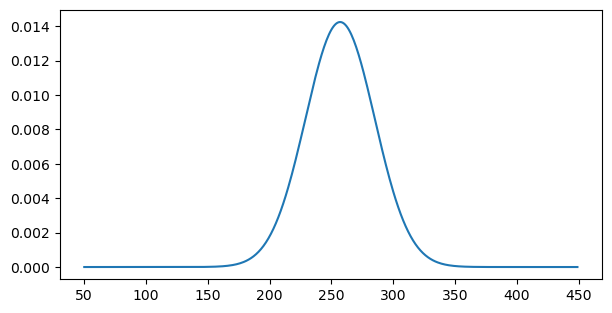

In [29]:
mean_females = 257
std_females = 28

x_axis = np.arange(50, 450)
y_axis_females_theoretical = sp.stats.norm.pdf(x_axis, mean_females, std_females)

plt.plot(x_axis, y_axis_females_theoretical);

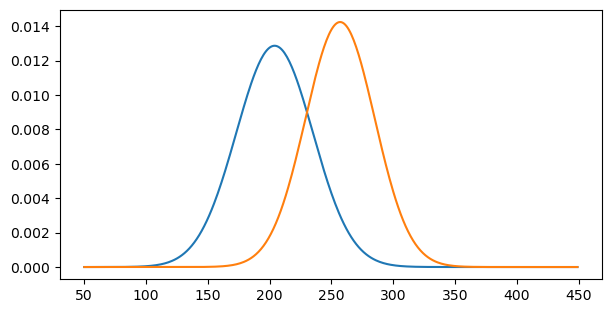

In [30]:
plt.plot(x_axis, y_axis_males_theoretical)
plt.plot(x_axis, y_axis_females_theoretical)

In [31]:
len(sales_males), len(sales_females) 

(439, 561)

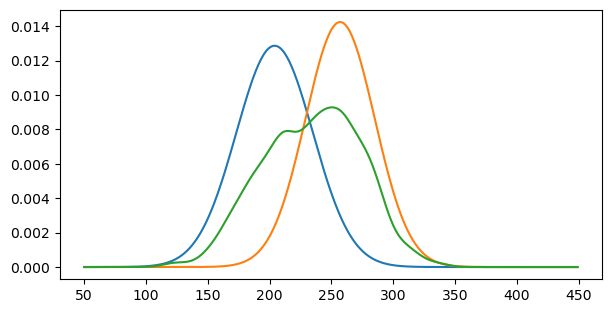

In [32]:
plt.plot(x_axis, y_axis_males_theoretical, label='male')
plt.plot(x_axis, y_axis_females_theoretical, label='female')
plt.plot(x_axis, y_axis_total_kde, label="kde-based")

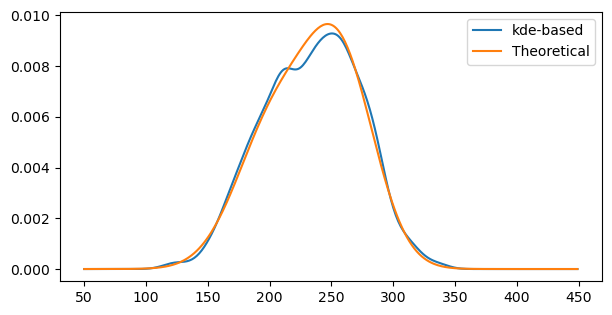

In [36]:
y_axis_total_theoretical = ((len(sales_males) / 1000) * y_axis_males_theoretical 
                                + (len(sales_females) / 1000) * y_axis_females_theoretical)

plt.plot(x_axis, y_axis_total_kde, label="kde-based")
plt.plot(x_axis, y_axis_total_theoretical, label= "Theoretical")

plt.legend();

### Question

- Suppose we have access to the two means ($\mu_1$ and $\mu_2$) and two std deviations ($\sigma_1$ and $\sigma_2$) describing two populations $P_1$ and $P_2$

- Given a new point, $x_1$, how can we guess which population the point is most likely to have come from?


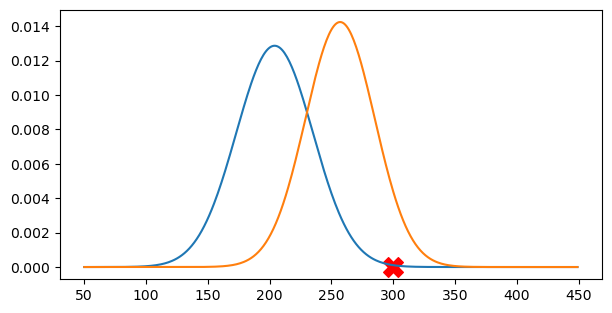

In [37]:
plt.plot(x_axis, y_axis_males_theoretical)
plt.plot(x_axis, y_axis_females_theoretical)
plt.scatter(300, 0, color='red', marker="X", s=200);

### Inferring Model Parameters of Gaussian Mixture Model

* The parameters we need to infer here are:
  1. The mean and standard deviation for the males' sales
  2. The mean and standard deviation for the females' sales
  3. The proportion of males to females

* Catch 22
  * We can easily infer these parameters if we know which point comes from which group
    * Compute the mean and standard deviation for each group independently
  * If we know the means and standard deviations, we could easily assign an unknown point to its distribution
    * Compute the probability of each point under each distribution


### Key Idea 1 

* If we know which cluster each of the points belongs to, then generating the model parameters is easy

<center><img src="https://www.dropbox.com/scl/fi/ppoxro6wqcb4zk2lbdgx1/labeled_data.png?rlkey=5hrqj4v4sa90ldg1io37j0wdp&dl=1" alt="drawing" style="width:500px"/>


### Key Idea 1 -- Cont'd

* Compute the mean and the standard deviation of each group

<center><img src="https://www.dropbox.com/scl/fi/sm6cwc017sr6nydvmuw6b/compute_mu_sigma.png?rlkey=zrjvky8fhd601h6kczs0mgtqd&dl=1" alt="drawing" style="width:500"/>


### Key Idea 1 

* If we know which cluster each of the points belongs to, then generating the model parameters is easy

<center><img src="https://www.dropbox.com/scl/fi/ppoxro6wqcb4zk2lbdgx1/labeled_data.png?rlkey=5hrqj4v4sa90ldg1io37j0wdp&dl=1" alt="drawing" style="width:500px"/></center>
    
* Compute the mean and the standard deviation of each group

<center><img src="https://www.dropbox.com/scl/fi/sm6cwc017sr6nydvmuw6b/compute_mu_sigma.png?rlkey=zrjvky8fhd601h6kczs0mgtqd&dl=1" alt="drawing" style="width:500"/>


### Inferring the Likelhood of Each Point Under Each Cluster

* The Likelihood that a data point $x$ came from the blue curve is

$$
p(x| \mu_b, \sigma_b) = \frac{1}{\sigma_b\sqrt{2\pi}}exp\left(-\frac{(x-\mu_b)^2}{2\sigma_b^2}\right)
$$

* The Likelihood that the point came from the orange curve is

$$
p(x| \mu_o, \sigma_o) = \frac{1}{\sigma_o\sqrt{2\pi}}exp\left(-\frac{(x-\mu_o)^2}{2\sigma_o^2}\right)
$$


<!-- * Assuming the probability of $p(b)$ and $p(o)$ are the same
  * The probability of observing a blue point is the same as the probability of observing an orange point.
  
$$
p(x|b) = \frac{p(x| \mu_b, \sigma_b)}{p(x| \mu_b, \sigma_b) + p(x| \mu_o, \sigma_o)}
$$ -->

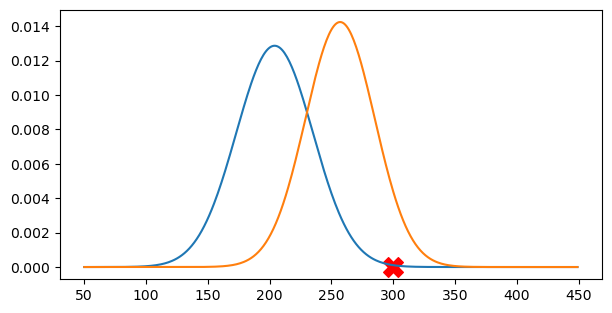

In [38]:
plt.plot(x_axis, y_axis_males_theoretical)
plt.plot(x_axis, y_axis_females_theoretical)
plt.scatter(300, 0, color='red', marker="X", s=200);

In [39]:
print(mean_males, std_males)
print(mean_females, std_females)

204 31
257 28


In [40]:
pdf_males_curve = sp.stats.norm.pdf(300, mean_males, std_males)
pdf_females_curve = sp.stats.norm.pdf(300, mean_females, std_females)

print("Probability that the point come from the males distribution is {0:.3f}".format(pdf_males_curve / (pdf_males_curve + pdf_females_curve)))
print("Probability that the point come from the females distribution is {0:.3f}".format(pdf_females_curve / (pdf_males_curve + pdf_females_curve)))

Probability that the point come from the males distribution is 0.024
Probability that the point come from the females distribution is 0.976


### Key Idea 2 

* Each observation is assumed to belong to a cluster $c_i$ according to membership probabilities that sum up to 1

  * We do not use a “hard” label that assigns a point exclusively to either clusters


* Observation above has $X\%$ of belonging to  the blue cluster and $Y\%$ belonging to the orange cluster

  * We compute these probabilities as:

$$
X = \frac{{p(x \in \mbox{cl}_b~\mbox{|}~~ \mu_b, \sigma_b)}}{p(x \in \mbox{cl}_b~\mbox{|}~~ \mu_b, \sigma_b) + p(x \in \mbox{cl}_o~\mbox{|}~~ \mu_o, \sigma_o)}
$$

$$
Y = \frac{{p(x \in \mbox{cl}_o~\mbox{|}~~ \mu_o, \sigma_o)}}{p(x \in \mbox{cl}_b~\mbox{|}~~ \mu_b, \sigma_b) + p(x \in \mbox{cl}_o~\mbox{|}~~ \mu_o, \sigma_o)}
$$

### Using Expectation-Maximization

* Expectation-Maximization (EM) is a widely used algorithm designed to find hidden structures in data, particularly useful in situations where there are unobserved independent components.

* It is an iterative process that alternates between two main steps:

  * **Expectation Step (E-step)**: Estimates the probabilities of the latent variables given the current estimates of the parameters. For example, it calculates the probability that each observation belongs to a particular cluster.
  * **Maximization Step (M-step)**: Updates the parameters (such as $\mu_i$ and $\sigma_i$ for each cluster) to maximize the likelihood of the data given the estimated probabilities from the E-step.

* This iteration continues until there is no significant improvement in the likelihood, indicating convergence of the algorithm.


### Using Expectation-Maximization -- Cont'd

* Pretending that we know the parameters of each cluster 
  * We use that information to estimate the probability that each point belongs to each component
  * We do not assign a point to a cluster as in k-Means

* Pretending we know the probability with which each observation belongs to a component 
  * Use that information to estimate the distribution parameters of each cluster
  * Recall that a point does not belong exclusively to one single cluster
    * This is something we need to take into account

### The EM Algorithm in k-Means

* Although we did not expressively define it as so, k-means also uses expectation–maximization 
  * Choose starting guesses for the location 

* For each point, repeat until converged:
  * E-step: for each point, find its closest mean and assign it to the corresponding cluster
  * M-step: for each cluster, update the cluster's mean, based on all data points in that cluster

### EM Example: Data

* We are analyzing data in one dimension ($x$)

  *  We know the data comes from two clusters but is unlabeled
  *  We want to discover the parameters of those Gaussians 
  
<center><img src="https://www.dropbox.com/scl/fi/bn84mcjv6ds8ahca8pa90/data.png?rlkey=up6m6eu80cavxz302lzgbyx17&dl=1" alt="drawing" width="700"/>


### EM Example: Initialization

* We initialize the distributions' parameters using random values for the means and the standard deviations
  * Means can be assigned randomly or using more informed methods, such as using a full round of k-means

<center><img src="https://www.dropbox.com/s/jljd4eugnwk6a02/init.png?dl=1" alt="drawing" width="700"/>


### EM Algorithm: Expectation Step 

* How likely is each of the points to be from each of the distribution?

  *  Given each point, what is its `pdf` given each of the Gaussians?

  * Each point has a little bit of the first distribution and a bit of the second
    * Here we use colors (blue and orange) to illustrate that
    
<center><img src="https://www.dropbox.com/scl/fi/9alkzekxnk2ghs4sqcfra/expectation.png?rlkey=4nsx4v8bd5voacaxcmhbff9h1&dl=1" alt="drawing" width="700"/>


### EM Algorithm: Expectation Step -- Cont'd


* A point $i$ is $O_i$ orange and $B_i$ blue, where

$$
B_i = \frac{p(x_i| \mu_b, \sigma_b)}{p(x_i| \mu_b, \sigma_b) + p(x_i| \mu_o, \sigma_o)}
$$

$\hspace{0.6in}$ and 

$$
O_i = \frac{p(x_i| \mu_o, \sigma_o)}{p(x_i| \mu_b, \sigma_b) + p(x_i| \mu_o, \sigma_o)}
$$

* Recompute the mean and the standard deviation of each distribution based on its points
  * Each of the points is going to contribute only its probabilities ($B_i$ and $O_i$) worth to computing the parameters 


### EM Algorithm: Maximization Step

* Ex. Rather than computing the mean as $\mu_b = \sum_{x_i \in Blue} x_i/n_b$, we are going to use a weighted average

$$
   \mu_b = \frac{\sum {B_i}x_i}{\sum B_i}
$$

* We compute the standard deviation in a similar fashion by discounting the contributions of each point by its contribution to other clusters

$$
   \sigma_b = \sqrt{\frac{\sum {B_i}(x_i - \mu_b)^2}{\sum B_i}}
$$

* It is easier to understand this if you think of it in terms of k-means (the $B_i$s are simply 0 or 1). 
  * I.e., in k-means it gives all its mass to one cluster
  * Here, each point gives some value in [0, 1] to each of the Gaussians


### EM Algorithm: Maximization Step -- Cont'd

<center><img src="https://www.dropbox.com/scl/fi/z2c62xwpy4nltp8ivxsm1/maximization.png?rlkey=2b62il98ni1nah7okiq376soy&dl=1" alt="drawing" width="700"/>

### EM Algorithm: Second Iteration

<center><img src="https://www.dropbox.com/scl/fi/7xgjnrgviapquremtu5c7/em_step_2.png?rlkey=keutdr745dk9vop6ok91jj3mb&dl=1" alt="drawing" width="1000"/>

### EM Algorithm: Final Results

* After multiple iterations, we arrive at a stable solution

<center><img src="https://www.dropbox.com/scl/fi/ro9uw1nopqc5pp1931xni/em_step_final.png?rlkey=bq8mgvmdpi2x6wvjih9pp4ek8&dl=1" alt="drawing" width="700"/>


### Assumptions about EM 

* Note that here, we assumed that priors for each cluster are identical, i.e., $P(O) =P(B)$

* If that's not the case, then we would need to evaluate the priors for each iteration

* $P(B) = \sum(B_i) / n$
  * It's common to start with equal priors to avoid the possibility that a  cluster is squashed
  * If $P(O)=0$, then our solution never works

* Similar to k-means, there are no guarantees that EM converges
 
 * Common to repeat using different initializations 


### Gaussian Mixture Model 

* A data modeling technique which attempts to find a mixture of Gaussian probability distributions that best model the input

* Assumes the source is Gaussian
  * The Gaussian can be multi-dimensional 
 
* Instead of assigning a point to a cluster, it assigns the point to the all clusters $c_i$, each with a probability $p_i$
  * Provides confidence measure about the point being in any of the clusters
  
* Uses the EM algorithm to identify the parameters of each component


In [41]:
X1 = np.random.multivariate_normal([0, 0], [[3, 0], [0, 10]], 100)
X2 = np.random.multivariate_normal([5, 5], [[4, 0], [0, 10]], 100)

X= np.concatenate([X1, X2])
y_true = [0]*len(X1) + [1]*len(X2)

X.shape

(200, 2)

In [42]:
X[:4, :]

array([[-0.47052045, -1.72875422],
       [ 2.32174665,  5.29192016],
       [ 1.4371387 , -4.10963671],
       [-1.98885036,  2.5658612 ]])

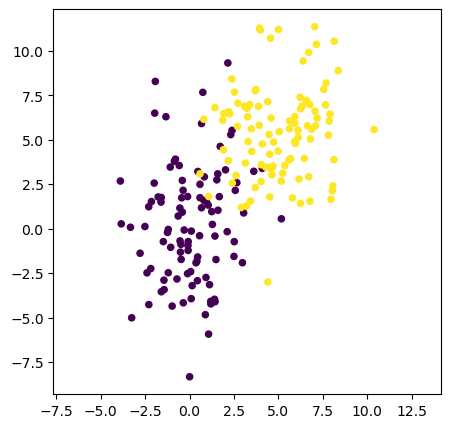

In [43]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=20, cmap='viridis')
plt.axis('equal');

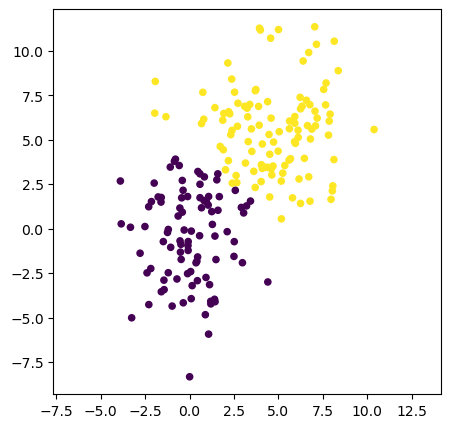

In [59]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0, n_init=10)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=1-labels, s=20, cmap='viridis')
plt.axis('equal');

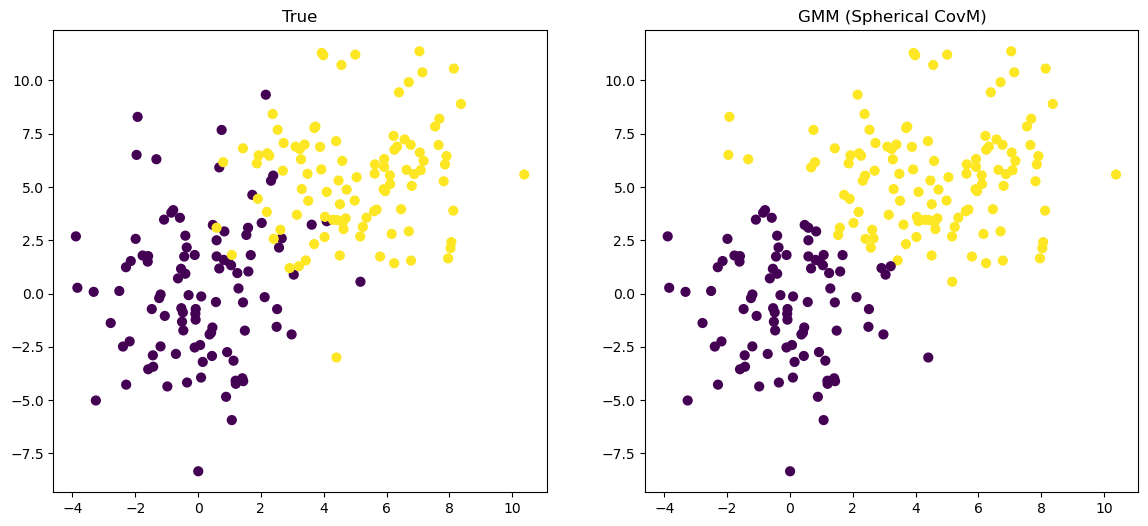

In [62]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')
plt.title("True")

from sklearn.mixture import GaussianMixture

# 'spherical' covariance type: each component has its own single variance 
gmm = GaussianMixture(n_components=2, covariance_type="spherical", max_iter=1000).fit(X)
labels = gmm.predict(X)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.title("GMM (Spherical CovM)");

In [72]:
data.shape

(200, 2)

In [71]:
data = pd.DataFrame({"y_true": y_true, "predicted": labels})
data[data["y_true"] != data["predicted"]]

,y_true,predicted
1,0,1
4,0,1
9,0,1
19,0,1
26,0,1
31,0,1
34,0,1
40,0,1
52,0,1
59,0,1


In [75]:
len(data[data["y_true"] != data["predicted"]])

22

In [76]:
pred_prob = gmm.predict_proba(X)
predictions = np.max(pred_prob, axis=1).round(3)
data["prob"] = predictions
data.head(10)

,y_true,predicted,prob
0,0,0,0.997
1,0,1,0.978
2,0,0,0.999
3,0,0,0.928
4,0,1,0.714
5,0,0,1.000
6,0,0,0.527
7,0,0,0.840
8,0,0,0.985
9,0,1,0.771


In [77]:
data[data["y_true"] != data["predicted"]]

,y_true,predicted,prob
1,0,1,0.978
4,0,1,0.714
9,0,1,0.771
19,0,1,0.985
26,0,1,0.590
31,0,1,0.545
34,0,1,0.955
40,0,1,0.912
52,0,1,1.000
59,0,1,0.720


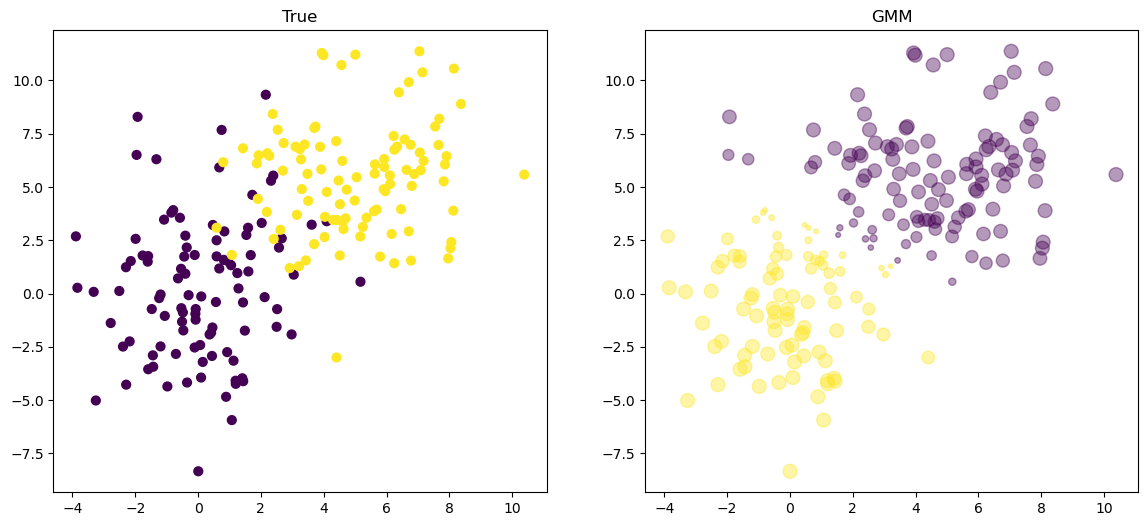

In [78]:
good = np.where(data["prob"] > 0.85)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')
plt.title("True")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=1-labels, s=100**data["prob"], cmap='viridis', alpha=0.4)
plt.title("GMM");

### Multivariate Gaussians

* Data is usually in $d$ dimensions
* E.g., a mortgage company who wants to predict whether an individual qualify for a mortgage may have the following features:
  * Income
  * Gender
  * Age
  * Years of employment with current employer
  * Credit Score
  * Debt to income ratio
  * \# of traffic citations
  * \# of credit inquiries
  * \# of recent delinquencies
* Based on the features above, the data is in 9 dimensions
* Hard or impossible to visualize data above 9 dimensions in a way that conveys a desired message
    * Try to understand the concept in 2 dimensions


In [91]:
male_weights = np.random.normal(87, 13, 100)
female_weights = np.random.normal(73, 8, 100)

male_heights = np.random.normal(69, 3, 100)
female_heights = np.random.normal(63, 3, 100)

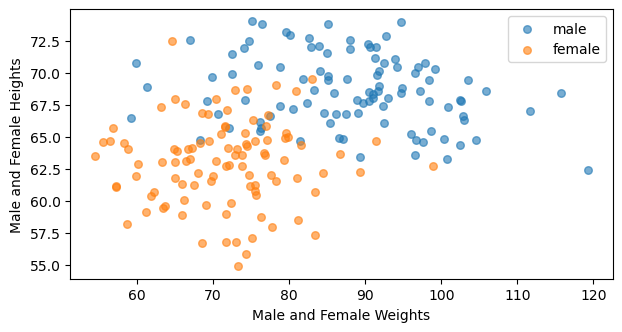

In [99]:
plt.scatter(male_weights, male_heights, s=30, alpha=0.6, label='male')
plt.scatter(female_weights, female_heights, s=30, alpha=0.6, label='female')
plt.xlabel("Male and Female Weights")
plt.ylabel("Male and Female Heights")
_ = plt.legend()

### Multivariate Gaussian

* A multivariate Gaussian distribution, or joint Guassian distribution is a generalization of the one-dimensional (univariate) normal distribution to higher dimensions
  * Bivariate is the generalization to two joint Gaussian distributions

* A random vector is said to be k-variate normally distributed if every linear combination of its k components has a univariate normal distribution

### Multivariate Gaussian - Cont'd

* Random vector: This refers to a vector whose elements are random variables. In this context, the vector has 
$k$ components, or  $k$ different random variables.

* K-variate normally distributed: This means that the vector of $k$ random variables follows a multivariate normal distribution. 
  * Each component of the vector can have its own mean and variance, and the components can be correlated with each other.
  
Every linear combination of its $k$ components has a univariate normal distribution: This is a crucial characteristic of multivariate normal distributions. What it essentially means is that if you take any linear combination of the components of this vector—say, 
�
1
�
1
+
�
2
�
2
+
.
.
.
+
�
�
�
�
a 
1
​
 X 
1
​
 +a 
2
​
 X 
2
​
 +...+a 
k
​
 X 
k
​
  where 
�
1
,
�
2
,
.
.
.
,
�
�
X 
1
​
 ,X 
2
​
 ,...,X 
k
​
  are the components of the vector and 
�
1
,
�
2
,
.
.
.
,
�
�
a 
1
​
 ,a 
2
​
 ,...,a 
k
​
  are any real numbers—the resulting random variable will also be normally distributed. This property ensures that no matter how you linearly combine the variables, the output remains within the family of normal distributions.

### Multivariate Gaussian -- Cont'd 

* The multivariate normal distribution of a k-dimensional random vector  $ \mathbf {X} =(X_{1},\ldots ,X_{k}) $, where

$$ 
X_i \ \sim \ {\mathcal {N}}({\mu_i},\, \sigma_i)$$

$\hspace{0.6in}$ and 

$$ 
\mathbf {X} \ \sim \ {\mathcal {N}}({\boldsymbol {\mu }},\,{\boldsymbol {\Sigma }})
$$ 

$\hspace{1in} - ~~\Sigma$ is the covariance matrix, i.e.,

$$ 
\Sigma _{i,j} = \operatorname{Cov} (X_{i},X_{j}) 
$$

* Recall that you can think of the covariance as a "sort of" scale free measure of the dependence between two variables $X_i$ and $X_j$
  * Unlike correaltion, change in scale affects the covariance, which ranges between $-\infty$ and $+\infty$

$$
\operatorname{Cov}(X_i, X_j) = corr(X_i, X_j) \times \sigma_{X_i}\sigma_{X_j}
$$


### The Covariance Matrix

<center><img src="https://www.dropbox.com/s/4ppc7cdqj1qivyv/cov_matrix.png?dl=1"/></center>


In [105]:
### The Covariance Matrix

cov_matrix = [[0.5, 0], [0, 0.5]]
data = np.random.multivariate_normal([20, 40], cov_matrix, 10)
data

array([[20.59807295, 40.36349712],
       [19.67390376, 40.53497201],
       [19.01394308, 40.74521386],
       [19.15534473, 40.20209344],
       [19.4023859 , 40.3913051 ],
       [19.97601124, 38.87233725],
       [20.29747956, 39.5913483 ],
       [20.62306482, 40.0009374 ],
       [20.27960486, 39.3228965 ],
       [19.58327918, 39.67569351]])

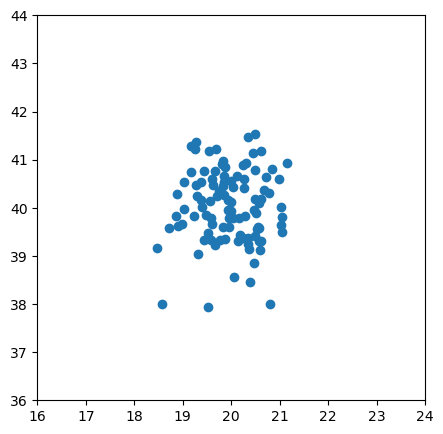

In [106]:
data = np.random.multivariate_normal([20, 40], cov_matrix, 100)

plt.figure(figsize=(5, 5))
plt.scatter(data[:, 0], data[:, 1])
plt.xlim(16, 24)
plt.ylim(36, 44);

In [107]:
### The Covariance Matrix

cov_matrix = [[2, 0], [0, 2]]
data = np.random.multivariate_normal([20, 40], cov_matrix, 10)
data

array([[19.73006592, 39.71970899],
       [20.72147161, 41.79968598],
       [20.17863525, 39.33654878],
       [18.59587544, 37.95617111],
       [20.94224761, 40.81738507],
       [20.81651533, 39.81804807],
       [21.9897062 , 39.31535306],
       [21.35095471, 39.94520927],
       [19.1396621 , 40.8379644 ],
       [20.57931295, 40.50483572]])

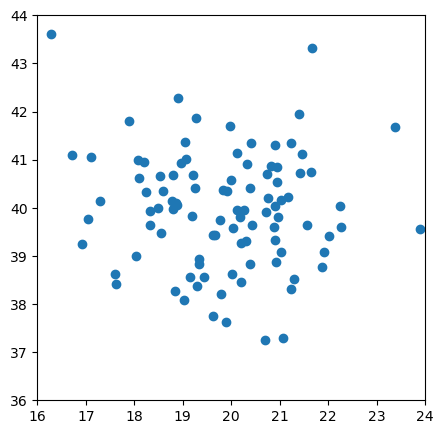

In [108]:
data = np.random.multivariate_normal([20, 40], cov_matrix, 100)

plt.figure(figsize=(5, 5))
plt.scatter(data[:, 0], data[:, 1])
plt.xlim(16, 24)
plt.ylim(36, 44);

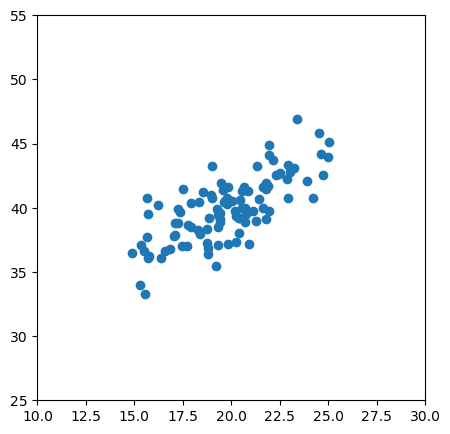

In [109]:
cov_matrix  = [[6.6, 5.35], [5.35, 6.9]]
data =  np.random.multivariate_normal([20, 40], cov_matrix, 100)

plt.figure(figsize=(5, 5))
plt.scatter(data[:, 0], data[:, 1])
plt.xlim(10, 30)
plt.ylim(25, 55);

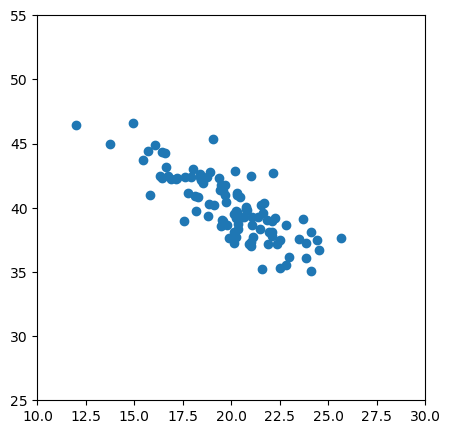

In [110]:
cov_matrix  = [[6.6, -5.35], [-5.35, 6.9]]
data =  np.random.multivariate_normal([20, 40], cov_matrix, 100)

plt.figure(figsize=(5, 5))
plt.scatter(data[:, 0], data[:, 1])
plt.xlim(10, 30)
plt.ylim(25, 55);

### Bivariate Gaussian

* We are going to model all the data in one go

* The parameters of a mutivariate Gaussian are the vector of means $\bf{m} \in  \mathcal{R}^{d} $ and the covariance matrix $\Sigma \in \mathcal{R}^{d \times d}$

<center><img src="https://www.dropbox.com/scl/fi/pm1cmuyi7d2rivwtjlla4/multi-variate.png?rlkey=ymzylbhe8wy8opz25kwmhkx8p&dl=1" alt="drawing" width="900"/>


### How to Determine the Number of Gaussians to Represent the Data?

* Similar problem to finding the number of clusters (means) in k-means
  * Use, for instance, Silhouette Score

